<img src="https://github.com/s-simin/Data_Science_Projects/blob/main/02_Singapore_Housing_Data_and_Kaggle_Challenge/images/proj_logo.png?raw=true" style="float: left; margin: 0px 20px 0px 20px; height: 155px;">  

<h1 style="font-family: Segoe UI; color: black; line-height: 1.3;"><strong>Project 2</strong><br>
Singapore Housing Data and Kaggle Challenge</h1>  
<br><br><br>
<div style="text-align: left;">
<h3>Authors : Suen Si Min, Ngan Han Kiong, Michael King Sutanto, Irfan Muzafar<br>
Course : DSI-SG-42</h3></div>

---

## Part 2 - Feature Engineering and Modelling

### Contents:
- [1.1 Data Import](#1.1-Data-Import)
- [1.2 Features Review and Creation](#1.2-Features-Review-and-Creation)
- [2.1 Hot End Encoding and Scaling](#2.1-Hot-End-Encoding-and-Scaling)
- [2.2 Linear Regression, Lasso Regression and Ridge Regression Modelling](#2.2-Linear-Regression,-Lasso-Regression-and-Ridge-Regression-Modelling)
- [2.3 Regression using StatsModel](#2.3-Regression-using-StatsModel)
- [2.4 Hyperparameter Tuning](#2.4-Hyperparameter-Tuning)
- [2.5 Check for Linear Regression Assumptions](#2.5-Check-for-Linear-Regression-Assumptions)
- [2.5 Model Evaluation](#2.5-Model-Evaluation)

## 1. Feature Engineering

### 1.1 Data Import

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from joblib import dump

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats
import statsmodels.api as sm

In [43]:
# Importing data.
df = pd.read_csv('../datasets/train_filtered_1.csv', index_col=0)

In [44]:
# checking if correct file
df['planning_area'].unique()

array(['Kallang', 'Bishan', 'Bukit Batok', 'Yishun', 'Geylang', 'Hougang',
       'Bedok', 'Sengkang', 'Tampines', 'Serangoon', 'Bukit Merah',
       'Bukit Panjang', 'Woodlands', 'Jurong West', 'Toa Payoh',
       'Choa Chu Kang', 'Sembawang', 'Novena', 'Ang Mo Kio', 'Pasir Ris',
       'Clementi', 'Punggol', 'Jurong East', 'Rochor', 'Queenstown',
       'Bukit Timah', 'Outram', 'Tanglin', 'Marine Parade',
       'Western Water Catchment', 'Downtown Core', 'Changi'], dtype=object)

In [45]:
# checking if correct file
df['flat_type'].unique()

array(['4 ROOM', '5 ROOM', 'EXECUTIVE', '3 ROOM', '2 ROOM', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

### 1.2 Features Review and Creation

In [46]:
# Set max column display to see all the columns
pd.options.display.max_columns = 28

In [47]:
# Inspecting the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150634 entries, 0 to 150633
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   resale_price               150634 non-null  float64
 1   price_per_sqft             150634 non-null  float64
 2   floor_area_sqft            150634 non-null  float64
 3   planning_area              150634 non-null  object 
 4   lease_commence_date        150634 non-null  int64  
 5   tranc_year                 150634 non-null  int64  
 6   mid_storey                 150634 non-null  int64  
 7   max_floor_lvl              150634 non-null  int64  
 8   commercial                 150634 non-null  int64  
 9   market_hawker              150634 non-null  int64  
 10  multistorey_carpark        150634 non-null  int64  
 11  precinct_pavilion          150634 non-null  int64  
 12  total_dwelling_units       150634 non-null  int64  
 13  mall_nearest_distance      150634 

In [48]:
df.head()

,resale_price,price_per_sqft,floor_area_sqft,planning_area,lease_commence_date,tranc_year,mid_storey,max_floor_lvl,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,mall_nearest_distance,...,hawker_nearest_distance,hawker_within_1km,mrt_interchange,mrt_nearest_distance,bus_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation,city_distance,flat_type
0,680000.0,701.928238,968.760,Kallang,2006,2016,11,25,0,0,0,0,142,1094.090418,...,154.753357,3.0,0,330.083069,0,29.427395,1138.633422,78,1,1138.633422,224,0,4.223704,4 ROOM
1,665000.0,475.230826,1399.320,Bishan,1987,2012,8,9,0,0,0,0,112,866.941448,...,640.151925,1.0,1,903.659703,1,58.207761,415.607357,45,1,447.894399,232,0,7.027402,5 ROOM
2,838000.0,540.639580,1550.016,Bukit Batok,1997,2013,14,16,0,0,0,0,90,1459.579948,...,1762.082341,0.0,0,1334.251197,1,214.747860,498.849039,39,0,180.074558,188,0,12.149659,EXECUTIVE
3,550000.0,496.080066,1108.692,Bishan,1992,2012,3,11,1,0,0,0,75,950.175199,...,726.215262,1.0,1,907.453484,1,43.396521,389.515528,20,1,389.515528,253,1,8.391652,4 ROOM
4,298000.0,333.552717,893.412,Yishun,1987,2017,2,4,0,0,0,0,48,729.771895,...,1540.151439,0.0,0,412.343032,0,129.422752,401.200584,74,0,312.025435,208,0,14.753850,4 ROOM


In [49]:
# Create a feature 'age_sold' which is the age when the flat was sold which is different from the age of the flat to the year 2021
df['age_sold'] = df['tranc_year'] - df['lease_commence_date']
df

,resale_price,price_per_sqft,floor_area_sqft,planning_area,lease_commence_date,tranc_year,mid_storey,max_floor_lvl,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,mall_nearest_distance,...,hawker_within_1km,mrt_interchange,mrt_nearest_distance,bus_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation,city_distance,flat_type,age_sold
0,680000.0,701.928238,968.760,Kallang,2006,2016,11,25,0,0,0,0,142,1094.090418,...,3.0,0,330.083069,0,29.427395,1138.633422,78,1,1138.633422,224,0,4.223704,4 ROOM,10
1,665000.0,475.230826,1399.320,Bishan,1987,2012,8,9,0,0,0,0,112,866.941448,...,1.0,1,903.659703,1,58.207761,415.607357,45,1,447.894399,232,0,7.027402,5 ROOM,25
2,838000.0,540.639580,1550.016,Bukit Batok,1997,2013,14,16,0,0,0,0,90,1459.579948,...,0.0,0,1334.251197,1,214.747860,498.849039,39,0,180.074558,188,0,12.149659,EXECUTIVE,16
3,550000.0,496.080066,1108.692,Bishan,1992,2012,3,11,1,0,0,0,75,950.175199,...,1.0,1,907.453484,1,43.396521,389.515528,20,1,389.515528,253,1,8.391652,4 ROOM,20
4,298000.0,333.552717,893.412,Yishun,1987,2017,2,4,0,0,0,0,48,729.771895,...,0.0,0,412.343032,0,129.422752,401.200584,74,0,312.025435,208,0,14.753850,4 ROOM,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150629,625000.0,360.645446,1733.004,Woodlands,1995,2020,5,12,1,0,0,0,60,585.138715,...,1.0,1,713.675852,1,137.566352,418.983965,43,0,189.889876,224,0,18.794565,EXECUTIVE,25
150630,455000.0,384.277558,1184.040,Jurong West,2001,2017,5,16,0,0,0,0,90,250.084466,...,0.0,0,239.773531,0,55.899763,136.298080,45,0,614.418470,188,0,18.193170,5 ROOM,16
150631,733000.0,472.898344,1550.016,Bedok,1993,2020,11,15,0,0,0,0,56,1790.053482,...,0.0,0,669.284215,0,143.388623,512.626814,43,1,556.889910,188,0,8.026280,EXECUTIVE,27
150632,338000.0,532.219766,635.076,Queenstown,1974,2016,8,10,0,0,0,0,209,587.244922,...,5.0,0,502.030710,0,246.171884,787.250957,82,0,832.386515,214,0,6.575968,3 ROOM,42


In the following section, we will do the following:

- For columns that have only 2 unique values, run t-tests to see if there is significant difference between the variables with 2 unique values and the resale price.
- If there are no significant difference between the variable and the resale price, it will be dropped. 

In [50]:
# Checking for number of unique values in each quantitative column
two_unique_values_col_num = []
for x in df.select_dtypes(include=('int64', 'float64')).columns:
    print(x, len(df[x].unique()))
    if len(df[x].unique()) == 2:
        two_unique_values_col_num.append(x)

# Listing the columns with only 2 unique values        
two_unique_values_col_num

resale_price 3295
price_per_sqft 24966
floor_area_sqft 169
lease_commence_date 54
tranc_year 10
mid_storey 22
max_floor_lvl 41
commercial 2
market_hawker 2
multistorey_carpark 2
precinct_pavilion 2
total_dwelling_units 320
mall_nearest_distance 8983
mall_within_1km 16
hawker_nearest_distance 9126
hawker_within_1km 10
mrt_interchange 2
mrt_nearest_distance 9126
bus_interchange 2
bus_stop_nearest_distance 9126
pri_sch_nearest_distance 9126
vacancy 66
pri_sch_affiliation 2
sec_sch_nearest_dist 9126
cutoff_point 54
affiliation 2
city_distance 9126
age_sold 54


['commercial',
 'market_hawker',
 'multistorey_carpark',
 'precinct_pavilion',
 'mrt_interchange',
 'bus_interchange',
 'pri_sch_affiliation',
 'affiliation']

We will set up a null hypothesis and an alternative hypothesis:

$$ H_0: \text{The difference between variable with only 2 values and the mean resale price is 0.} $$

$$ H_A: \text{The difference between variable with only 2 values and the mean resale price is NOT 0.} $$

In [51]:
# Dropping columns with only 2 unique values but no significant differences between the two groups
for col in two_unique_values_col_num:
    x,y = df[col].unique()
    t_statistic, p_value = stats.ttest_ind(df[df[col] == x]['resale_price'], df[df[col] == y]['resale_price'])
    if p_value > 0.05:
        df.drop(col, axis = 1, inplace = True)
        print(f'{col}: t-statistic: {round(t_statistic, 3)}, p-value: {round(p_value,3)}')
        print(f'{col} dropped as p-value > 0.05')
    else:
        print(f'{col}: t-statistic: {round(t_statistic, 3)}, p-value: {round(p_value,3)}')

commercial: t-statistic: 54.95, p-value: 0.0
market_hawker: t-statistic: 2.305, p-value: 0.021
multistorey_carpark: t-statistic: 3.027, p-value: 0.002
precinct_pavilion: t-statistic: -0.277, p-value: 0.781
precinct_pavilion dropped as p-value > 0.05
mrt_interchange: t-statistic: -25.833, p-value: 0.0
bus_interchange: t-statistic: -0.989, p-value: 0.323
bus_interchange dropped as p-value > 0.05
pri_sch_affiliation: t-statistic: 12.01, p-value: 0.0
affiliation: t-statistic: 0.181, p-value: 0.856
affiliation dropped as p-value > 0.05


In [52]:
df.head()

,resale_price,price_per_sqft,floor_area_sqft,planning_area,lease_commence_date,tranc_year,mid_storey,max_floor_lvl,commercial,market_hawker,multistorey_carpark,total_dwelling_units,mall_nearest_distance,mall_within_1km,hawker_nearest_distance,hawker_within_1km,mrt_interchange,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,city_distance,flat_type,age_sold
0,680000.0,701.928238,968.760,Kallang,2006,2016,11,25,0,0,0,142,1094.090418,0.0,154.753357,3.0,0,330.083069,29.427395,1138.633422,78,1,1138.633422,224,4.223704,4 ROOM,10
1,665000.0,475.230826,1399.320,Bishan,1987,2012,8,9,0,0,0,112,866.941448,1.0,640.151925,1.0,1,903.659703,58.207761,415.607357,45,1,447.894399,232,7.027402,5 ROOM,25
2,838000.0,540.639580,1550.016,Bukit Batok,1997,2013,14,16,0,0,0,90,1459.579948,0.0,1762.082341,0.0,0,1334.251197,214.747860,498.849039,39,0,180.074558,188,12.149659,EXECUTIVE,16
3,550000.0,496.080066,1108.692,Bishan,1992,2012,3,11,1,0,0,75,950.175199,1.0,726.215262,1.0,1,907.453484,43.396521,389.515528,20,1,389.515528,253,8.391652,4 ROOM,20
4,298000.0,333.552717,893.412,Yishun,1987,2017,2,4,0,0,0,48,729.771895,1.0,1540.151439,0.0,0,412.343032,129.422752,401.200584,74,0,312.025435,208,14.753850,4 ROOM,30


In [53]:
# Create interaction features
df['citydist*mallneardist'] = df['city_distance'] * df['mall_nearest_distance']
df['midstorey*floorarea'] = df['mid_storey'] * df['floor_area_sqft']
df.head()

,resale_price,price_per_sqft,floor_area_sqft,planning_area,lease_commence_date,tranc_year,mid_storey,max_floor_lvl,commercial,market_hawker,multistorey_carpark,total_dwelling_units,mall_nearest_distance,mall_within_1km,...,hawker_within_1km,mrt_interchange,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,city_distance,flat_type,age_sold,citydist*mallneardist,midstorey*floorarea
0,680000.0,701.928238,968.760,Kallang,2006,2016,11,25,0,0,0,142,1094.090418,0.0,...,3.0,0,330.083069,29.427395,1138.633422,78,1,1138.633422,224,4.223704,4 ROOM,10,4621.114014,10656.360
1,665000.0,475.230826,1399.320,Bishan,1987,2012,8,9,0,0,0,112,866.941448,1.0,...,1.0,1,903.659703,58.207761,415.607357,45,1,447.894399,232,7.027402,5 ROOM,25,6092.345812,11194.560
2,838000.0,540.639580,1550.016,Bukit Batok,1997,2013,14,16,0,0,0,90,1459.579948,0.0,...,0.0,0,1334.251197,214.747860,498.849039,39,0,180.074558,188,12.149659,EXECUTIVE,16,17733.398411,21700.224
3,550000.0,496.080066,1108.692,Bishan,1992,2012,3,11,1,0,0,75,950.175199,1.0,...,1.0,1,907.453484,43.396521,389.515528,20,1,389.515528,253,8.391652,4 ROOM,20,7973.539478,3326.076
4,298000.0,333.552717,893.412,Yishun,1987,2017,2,4,0,0,0,48,729.771895,1.0,...,0.0,0,412.343032,129.422752,401.200584,74,0,312.025435,208,14.753850,4 ROOM,30,10766.944827,1786.824


In [54]:
# Export to csv after more cleaning and feature engineering
df.to_csv("../datasets/train_filtered_2.csv", index = False)

## 2 Modeling

### 2.1 Hot End Encoding and Scaling 

In this section, we will be performing hot end encoding with OneHotEncoder and scaling with StandardScaler

In [55]:
# Selects all rows from the DataFrame df, but only columns starting from the third column onwards.
X = df.iloc[:, 2:]
X.head()

,floor_area_sqft,planning_area,lease_commence_date,tranc_year,mid_storey,max_floor_lvl,commercial,market_hawker,multistorey_carpark,total_dwelling_units,mall_nearest_distance,mall_within_1km,hawker_nearest_distance,hawker_within_1km,mrt_interchange,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,city_distance,flat_type,age_sold,citydist*mallneardist,midstorey*floorarea
0,968.760,Kallang,2006,2016,11,25,0,0,0,142,1094.090418,0.0,154.753357,3.0,0,330.083069,29.427395,1138.633422,78,1,1138.633422,224,4.223704,4 ROOM,10,4621.114014,10656.360
1,1399.320,Bishan,1987,2012,8,9,0,0,0,112,866.941448,1.0,640.151925,1.0,1,903.659703,58.207761,415.607357,45,1,447.894399,232,7.027402,5 ROOM,25,6092.345812,11194.560
2,1550.016,Bukit Batok,1997,2013,14,16,0,0,0,90,1459.579948,0.0,1762.082341,0.0,0,1334.251197,214.747860,498.849039,39,0,180.074558,188,12.149659,EXECUTIVE,16,17733.398411,21700.224
3,1108.692,Bishan,1992,2012,3,11,1,0,0,75,950.175199,1.0,726.215262,1.0,1,907.453484,43.396521,389.515528,20,1,389.515528,253,8.391652,4 ROOM,20,7973.539478,3326.076
4,893.412,Yishun,1987,2017,2,4,0,0,0,48,729.771895,1.0,1540.151439,0.0,0,412.343032,129.422752,401.200584,74,0,312.025435,208,14.753850,4 ROOM,30,10766.944827,1786.824


In [56]:
# Selects the column 'resale_price' from the DataFrame df
y = df.iloc[:,:1]
y

,resale_price
0,680000.0
1,665000.0
2,838000.0
3,550000.0
4,298000.0
...,...
150629,625000.0
150630,455000.0
150631,733000.0
150632,338000.0


In [57]:
# Defining numerical columns and categorical columns to be passed through SS and OHE respectively
one_hot_encode_cols = ['planning_area', 'flat_type']
standard_scale_cols = ['floor_area_sqft', 'lease_commence_date', 'tranc_year', 'mid_storey',
                       'max_floor_lvl', 'total_dwelling_units', 'mall_nearest_distance', 
                       'mall_within_1km', 'hawker_nearest_distance', 'hawker_within_1km', 
                       'mrt_nearest_distance', 'bus_stop_nearest_distance', 
                       'pri_sch_nearest_distance', 'vacancy', 'sec_sch_nearest_dist', 
                       'cutoff_point', 'city_distance', 'age_sold', 'citydist*mallneardist', 
                       'midstorey*floorarea']
pass_through_cols = ['commercial', 'market_hawker', 'multistorey_carpark', 'mrt_interchange', 'pri_sch_affiliation']

In [58]:
# Instantiating OHE, SS and CT
ohe = OneHotEncoder(min_frequency = 10)
ss = StandardScaler()
ct = make_column_transformer(
    (ohe, one_hot_encode_cols),
    (ss, standard_scale_cols),
    remainder='passthrough'  # Do not transform the remaining columns
)

ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(min_frequency=10),
                                 ['planning_area', 'flat_type']),
                                ('standardscaler', StandardScaler(),
                                 ['floor_area_sqft', 'lease_commence_date',
                                  'tranc_year', 'mid_storey', 'max_floor_lvl',
                                  'total_dwelling_units',
                                  'mall_nearest_distance', 'mall_within_1km',
                                  'hawker_nearest_distance',
                                  'hawker_within_1km', 'mrt_nearest_distance',
                                  'bus_stop_nearest_distance',
                                  'pri_sch_nearest_distance', 'vacancy',
                                  'sec_sch_nearest_dist', 'cutoff_point',
                                  'city_distance', 'age_sold',
                                  'citydist*mallneardist',
                                  'midstorey*floorarea'])])

In [59]:
# Perform a split of our X and y
# A default train-test split ratio of 75%-25% is chosen
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.columns

Index(['floor_area_sqft', 'planning_area', 'lease_commence_date', 'tranc_year',
       'mid_storey', 'max_floor_lvl', 'commercial', 'market_hawker',
       'multistorey_carpark', 'total_dwelling_units', 'mall_nearest_distance',
       'mall_within_1km', 'hawker_nearest_distance', 'hawker_within_1km',
       'mrt_interchange', 'mrt_nearest_distance', 'bus_stop_nearest_distance',
       'pri_sch_nearest_distance', 'vacancy', 'pri_sch_affiliation',
       'sec_sch_nearest_dist', 'cutoff_point', 'city_distance', 'flat_type',
       'age_sold', 'citydist*mallneardist', 'midstorey*floorarea'],
      dtype='object')

In [60]:
# Fit and transform the train split, X_train and test split, X_test
X_train_sc = ct.fit_transform(X_train)
X_test_sc = ct.transform(X_test)

print(X_train_sc)
print(X_test_sc)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


### 2.2 Linear Regression, Lasso Regression and Ridge Regression Modelling

In the following section, we will begin building our models with linear regression, lasson regression (L1) and ridge regression (L2).

#### Instantiate Models

In [61]:
# Create an instance of linear regression
lr = LinearRegression()

# Create an instance of lasso regression
lasso = LassoCV(n_alphas=200)

# Create an instance of ridge regression
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

#### Cross Validation Scores

In [62]:
# Cross validation score (r-squared) for linear regression model
cross_val_score(lr, X_train_sc, y_train, cv=5).mean()

0.873783693604687

In [63]:
# Cross validation score (r-squared) for lasso regression model
cross_val_score(lasso, X_train_sc, y_train, cv=5).mean()

0.8716636335713236

In [64]:
# Cross validation score (r-squared) for ridge regression model
cross_val_score(ridge, X_train_sc, y_train, cv=5).mean()

0.873785364501298

Interpretation:<br>
Based on the cross validation scores, ridge regression model gives the best cross validation score among the three. Hence, the model chosen will be the ridge regression model.  

#### Ridge Regression - Fitting to this model

In [65]:
# Fit model instance on train data
ridge.fit(X_train_sc, y_train);

# Generate predictions based on ridge regression model
y_preds = ridge.predict(X_test_sc)
y_preds

array([[413315.67557509],
       [549195.83192399],
       [813290.84414362],
       ...,
       [690253.05654323],
       [440405.24525474],
       [439291.44993738]])

In [66]:
# MSE for train data 
print(metrics.mean_squared_error(y_train, ridge.predict(X_train_sc)))

# MSE for test data 
print(metrics.mean_squared_error(y_test, y_preds))

2594994220.187452
2591637038.7877727


In [67]:
# RMSE for train data
print(metrics.mean_squared_error(y_train, ridge.predict(X_train_sc), squared=False))

# RMSE for test data
print(metrics.mean_squared_error(y_test, y_preds, squared=False))

50941.08577746897
50908.12350487663


In [68]:
# Train score (r-squared)
print(metrics.r2_score(y_train, ridge.predict(X_train_sc)))

# Test score (r-squared)
print(metrics.r2_score(y_test, y_preds))

0.8739647274149691
0.8728141722323628


Interpretation:<br>
- Overall, the model's performance seems reasonable, as indicated by the moderately high R-squared values and cross-validation score.
- However, the relatively high MSE and RMSE values suggest that there is still room for improvement in reducing prediction errors.

#### Ridge Regression Coefficients

In [69]:
# Returns an array of coefficients associated with each feature in the model for 'resale_price'. 
ridge.coef_[0]

array([-4.24263295e+03, -2.03224077e+04,  6.20050399e+04, -2.62768276e+04,
       -2.59369424e+03, -8.38218751e+04,  1.45468675e+05,  1.33823936e+05,
       -6.54161975e+04,  2.93860380e+04,  7.22658159e+04, -2.50847780e+04,
       -4.98041448e+04, -3.24276979e+04, -3.66111632e+04, -2.78056331e+04,
        1.68881789e+05, -1.35952298e+04,  2.14137874e+02, -3.12753288e+04,
       -2.24349928e+04,  2.89164629e+04, -8.45250960e+04, -7.75803646e+04,
       -7.21713571e+04,  1.14030150e+04, -9.79889756e+03,  1.89482286e+05,
       -1.86383364e+04, -4.14538081e+04, -7.14129613e+04, -2.45537714e+04,
       -6.62377957e+03, -5.29328409e+04, -2.67870778e+04, -2.30042850e+04,
       -1.55922311e+04,  2.74151150e+04,  9.75250993e+04,  7.68236608e+04,
        2.33670610e+04, -9.65863805e+03, -1.54921074e+04,  2.08847272e+04,
       -5.43505105e+03, -2.52933021e+04, -1.29452215e+03, -1.54883524e+04,
        4.42201707e+03, -2.53370606e+04, -1.55421500e+01,  6.34772478e+02,
       -3.16457097e+00,  

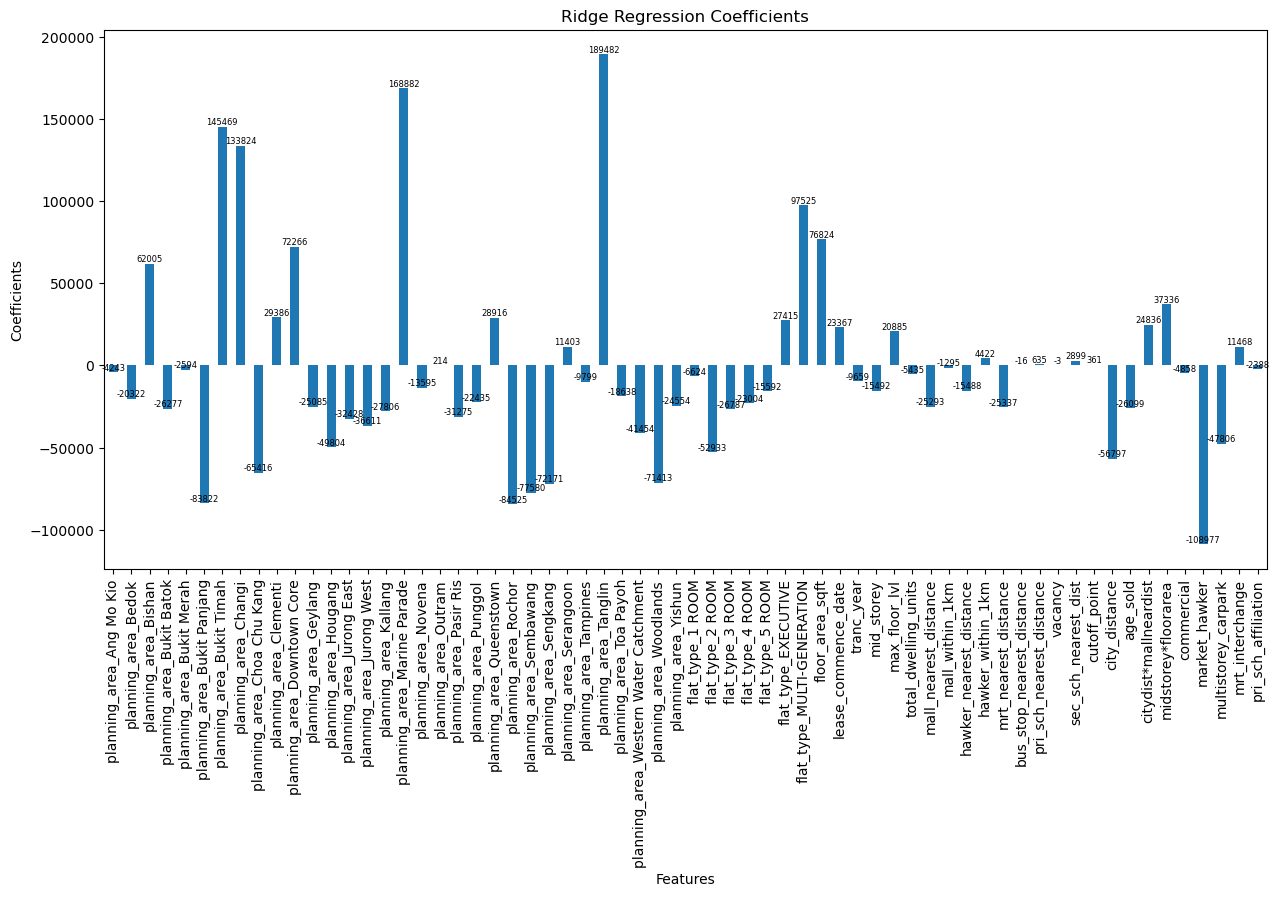

In [70]:
# Get the feature names after one-hot encoding
encoded_cat_cols = list(ct.named_transformers_['onehotencoder'].get_feature_names_out(input_features=one_hot_encode_cols))
features = encoded_cat_cols + standard_scale_cols + pass_through_cols

# Check if the number of features matches the number of coefficients
if len(features) != len(ridge.coef_[0]):
    print("Number of features does not match the number of coefficients.")
else:
# Plot the coefficients
    pd.Series(ridge.coef_[0], index=features).plot.bar(figsize=(15, 7))
for i in range(len(features)):
# Round the coefficient values to two decimal places
    coef_rounded = round(ridge.coef_[0][i])
    plt.annotate(f'{coef_rounded}', (i, ridge.coef_[0][i]), ha='center', va='bottom', fontsize=6)

plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Ridge Regression Coefficients')
plt.show()

Discounting the hot encoded features, 
- 'floor_area_sqft' has the largest positive coefficient, indicating that the floor area of a property has a strong positive influence on the resale prices. As the floor area increases, the resale prices tends to increase significantly.
- 'city_distance' has the largest negative coefficient which suggests that an increase in distance to the city is associated with a significant decrease in the resale prices. Buyers may prefer properties with easier access to urban amenities, employment opportunities, transportation, and other city attractions, leading to higher demand and, consequently, higher resale prices.

### MSE, RMSE and r-squared scores for both linear regression and lasso regression are generated here for model evaluation at the end. 

#### Linear Regression:

In [71]:
# Fit model instance on train data
lr.fit(X_train_sc, y_train);

# Generate predictions based on linear regression model
y_preds_lr = lr.predict(X_test_sc)

# MSE for train data 
print(metrics.mean_squared_error(y_train, lr.predict(X_train_sc)))

# MSE for test data 
print(metrics.mean_squared_error(y_test, y_preds_lr))

# RMSE for train data
print(metrics.mean_squared_error(y_train, lr.predict(X_train_sc), squared=False))

# RMSE for test data
print(metrics.mean_squared_error(y_test, y_preds_lr, squared=False))

# Train score (r-squared)
print(metrics.r2_score(y_train, lr.predict(X_train_sc)))

# Test score (r-squared)
print(metrics.r2_score(y_test, y_preds_lr))

2594999560.860782
2591681462.2990346
50941.13819753915
50908.55981364072
0.8739644680258676
0.8728119921272911


#### Lasso Regression:

In [72]:
# Fit model instance on train data
lasso.fit(X_train_sc, y_train);

# Generate predictions based on ridge regression model
y_preds_las = lasso.predict(X_test_sc)

# MSE for train data 
print(metrics.mean_squared_error(y_train, lasso.predict(X_train_sc)))

# MSE for test data 
print(metrics.mean_squared_error(y_test, y_preds_las))

# RMSE for train data
print(metrics.mean_squared_error(y_train, lasso.predict(X_train_sc), squared=False))

# RMSE for test data
print(metrics.mean_squared_error(y_test, y_preds_las, squared=False))

# Train score (r-squared)
print(metrics.r2_score(y_train, lasso.predict(X_train_sc)))

# Test score (r-squared)
print(metrics.r2_score(y_test, y_preds_las))

2639727827.9041634
2626418123.148229
51378.281675277576
51248.59142599169
0.8717920780894224
0.871107273874748


### 2.3 Regression using StatsModel

In the following section, we will run an Ordinary Least Square Regression using StatsModels

In [73]:
# Run an Ordinary Least Square Regression using StatsModels
X = df[standard_scale_cols]

X = sm.add_constant(X)
y = df['resale_price']
ols = sm.OLS(y, X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                 3.818e+04
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:58:56   Log-Likelihood:            -1.8696e+06
No. Observations:              150634   AIC:                         3.739e+06
Df Residuals:                  150614   BIC:                         3.739e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      4.086e+06   1.15e+05     35.563      0.000    3.86e+06    4.31e+06
floor_area_sqft             342.2889      1.144    299.178      0.000     340.046     344.531
lease_commence_date         546.4588     21.225     25.746      0.000     504.858     588.060
tranc_year                -2393.8130     37.486    -63.860      0.000   -2467.284   -2320.342
mid_storey                -2237.9455    133.652    -16.745      0.000   -2499.900   -1975.991
max_floor_lvl              3467.1102     41.429     83.688      0.000    3385.910    3548.310
total_dwelling_units        -89.1696      3.527    -25.281      0.000     -96.083     -82.257
mall_nearest_distance       -76.8471      1.314    -58.472      0.000     -79.423     -74.271
mall_within_1km           -2513.7478    136.994    -18.349      0.000   -2782.253   -2245.242
hawker_nearest_distance     -12.6043      0.199    -63.241      0.000     -12.995     -12.214
hawker_within_1km          2512.9084    148.153     16.962      0.000    2222.532    2803.284
mrt_nearest_distance        -51.9864      0.371   -140.162      0.000     -52.713     -51.259
bus_stop_nearest_distance    15.2467      2.781      5.483      0.000       9.796      20.697
pri_sch_nearest_distance      9.5022      0.711     13.368      0.000       8.109      10.895
vacancy                    -237.6762      9.032    -26.314      0.000    -255.379    -219.973
sec_sch_nearest_dist          6.6184      0.525     12.603      0.000       5.589       7.648
cutoff_point                114.0830      7.959     14.334      0.000      98.484     129.682
city_distance             -1.716e+04     87.727   -195.592      0.000   -1.73e+04    -1.7e+04
age_sold                  -2940.2718     21.282   -138.158      0.000   -2981.984   -2898.560
citydist*mallneardist         5.5978      0.097     57.747      0.000       5.408       5.788
midstorey*floorarea           5.4062      0.122     44.214      0.000       5.167       5.646
==============================================================================
Omnibus:                    24961.736   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73295.101
Skew:                           0.878   Prob(JB):                         0.00
Kurtosis:                       5.932   Cond. No.                     9.38e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.12e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- floor_area_sqft: For every 1 sqft increase in floor area, the resale price is expected to increase by approximately S\$342.29.
- lease_commence_date: For each additional year of lease commencement, the resale price is expected to increase by approximately S\$546.46.
- tranc_year: For every increase in transaction year by 1 year, the resale price is expected to decrease by approximately S\$2393.81.
- mid_storey: For every increase in mid-storey by 1 storey, the resale price is expected to decrease by approximately S\$2237.95.
- max_floor_lvl: For every increase in maximum floor level by 1 level, the resale price is expected to increase by approximately S\$3467.11.
- total_dwelling_units: For every increase in total dwelling units by 1, the resale price is expected to decrease by approximately S\$89.17.
- mall_nearest_distance: For every 1 m in distance to the nearest mall, the resale price is expected to decrease by approximately S\$76.85.
- mall_within_1km: If a mall is within 1km, the resale price is expected to decrease by approximately S\$2513.75.
- hawker_nearest_distance: For each unit increase in distance to the nearest hawker center, the resale price is expected to decrease by approximately S\$12.60.
- hawker_within_1km: If a hawker center is within 1km, the resale price is expected to increase by approximately S\$2512.91.
- mrt_nearest_distance: For every 1 m increase in distance to the nearest MRT station, the resale price is expected to decrease by approximately S\$51.99.
- bus_stop_nearest_distance: For every 1 m increase in distance to the nearest bus stop, the resale price is expected to increase by approximately S\$15.25.
- pri_sch_nearest_distance: For every 1 m increase in distance to the nearest primary school, the resale price is expected to increase by approximately S\$9.50.
- vacancy: For every increase in vacancies by 1, the resale price is expected to decrease by approximately S\$237.68.
- sec_sch_nearest_dist: For every 1 m increase in distance to the nearest secondary school, the resale price is expected to increase by approximately S$6.62.
- cutoff_point: For every increase in the cutoff point by 1 point, the resale price is expected to increase by approximately S\$114.08.
- city_distance: For every 1 m in city distance, the resale price is expected to decrease by approximately S\$17160.00.
- age_sold: For every 1 year increase in age when sold, the resale price is expected to decrease by approximately S\$2940.27.
- citydist*mallneardist: For each unit increase in the product of city distance and mall nearest distance, the resale price is expected to increase by approximately S\$5.60.
- midstorey*floorarea: For each unit increase in the product of mid-storey and floor area, the resale price is expected to increase by approximately S\$5.41.

Interpretation:<br>
All the variables included in the model have p-values less than 0.05, indicating that they are statistically significant in predicting the resale price. Therefore, all the variables listed in the regression results contribute significantly to explaining the variation in the resale price.

### 2.4 Hyperparameter Tuning

After deciding on the ridge regression model as the best model, hyperparameter tuning is carried out using GridSearchCV to determine the best parameters and hence get an even better ridge regression model. 

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV

# Define a range of alpha values to search
param_grid = {'cv': [3, 5, 10]}

# Create an instance of RidgeCV
ridge_cv = RidgeCV(alphas=np.linspace(0.1, 10, 100))

# Perform grid search using GridSearchCV
grid_search = GridSearchCV(estimator=ridge_cv, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_sc, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Generate predictions based on the best model
y_preds_1 = best_model.predict(X_test_sc)
y_preds_1

array([[413303.29139175],
       [549189.09990166],
       [813273.48127924],
       ...,
       [690247.46615805],
       [440408.70578242],
       [439293.10722629]])

In [75]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE for train data
mse_train = mean_squared_error(y_train, best_model.predict(X_train_sc))

# Calculate MSE for test data
mse_test = mean_squared_error(y_test, y_preds_1)

print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")

Train MSE: 2594999050.0811486
Test MSE: 2591625308.6484756


In [76]:
# Calculate RMSE for train data
rmse_train = np.sqrt(mse_train)

# Calculate RMSE for test data
rmse_test = np.sqrt(mse_test)

print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")

Train RMSE: 50941.133184109174
Test RMSE: 50908.008295831765


In [77]:
# Calculate R-squared score for train data
r2_train = r2_score(y_train, best_model.predict(X_train_sc))

# Calculate R-squared score for test data
r2_test = r2_score(y_test, y_preds_1)

print(f"Train R-squared: {r2_train}")
print(f"Test R-squared: {r2_test}")

Train R-squared: 0.8739644928337265
Test R-squared: 0.8728147478945616


- First ridge regression model before hyperparameter tuning has the following train r-squared scores of 0.8739647274149686 and test r-squared score of 0.8728141722328125
- Comparing the train and test r-squared scores, the train score has dropped marginally but the test score has improved marginally which means that the difference between the train and test score are smaller. 
- Therefore, the second ridge regression model after hyperparameter tuning is the one we will choose. 

### 2.5 Check for Linear Regression Assumptions

In the following section, we will check for whether our regression model fulfill the linear regression assumptions.

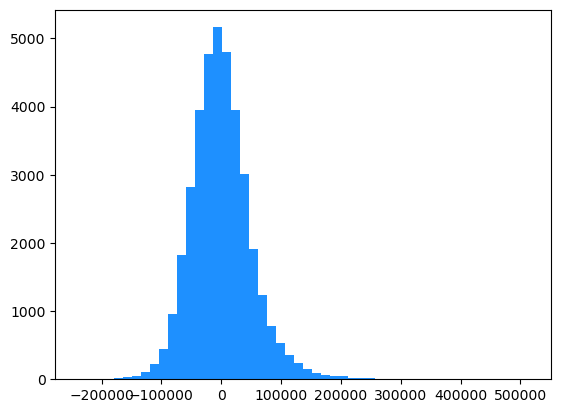

In [78]:
# Create a histogram to check for normal distribution errors
residuals=y_test-y_preds_1
plt.hist(residuals, bins=50, color='dodgerblue');

Interpretation:<br>
As seen from the histogram for the residuals, it is normally distributed and hence, the linear regression assumption is fulfilled. 

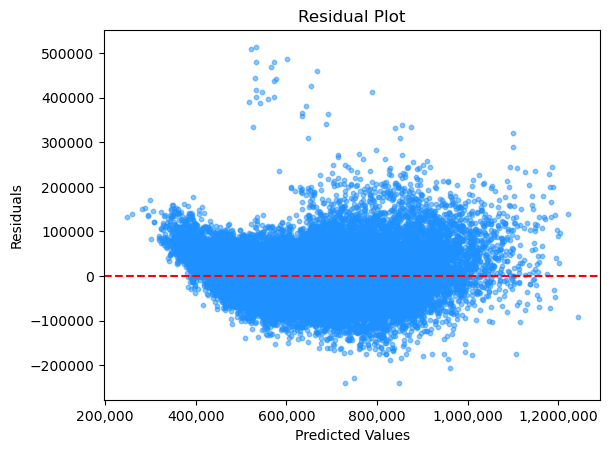

In [79]:
# Create a scatter plot to visualize the relationship between the predicted values (y_preds) and the residuals (residuals) of a regression model.

plt.scatter(y_preds_1,residuals, alpha=0.5, color='dodgerblue', s=10)

# Add a horizontal line at y = 0
plt.axhline(y=0, color='r', linestyle='--')  

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
tick_labels = ['0', '200,000', '400,000', '600,000', '800,000', '1,000,000', '1,2000,000']
plt.gca().set_xticklabels(tick_labels)
plt.show()

Interpretation:<br>
- The residuals are scattered in a horizontal band around the zero line, which is a desirable pattern. This suggests that the residuals (the difference between the observed and predicted values) are randomly distributed, indicating that the model's assumptions are likely satisfied.
- The residuals seem to have a relatively constant spread across the range of predicted values, which is another positive sign. (Side note: If the spread increased or decreased systematically with the predicted values, it would indicate heteroscedasticity (non-constant variance of residuals), violating one of the assumptions of linear regression.)
- There are a few observations with relatively large positive and negative residuals, which could be potential outliers. 
- The residuals do not appear to exhibit any clear nonlinear patterns, such as curved or U-shaped distributions. This suggests that the linear regression model is likely appropriate for the data.
- The residuals appear to be relatively symmetrically distributed around the zero line, which is a desirable feature. (Side note: Skewed residuals could indicate potential violations of the normality assumption or other underlying issues with the model.)

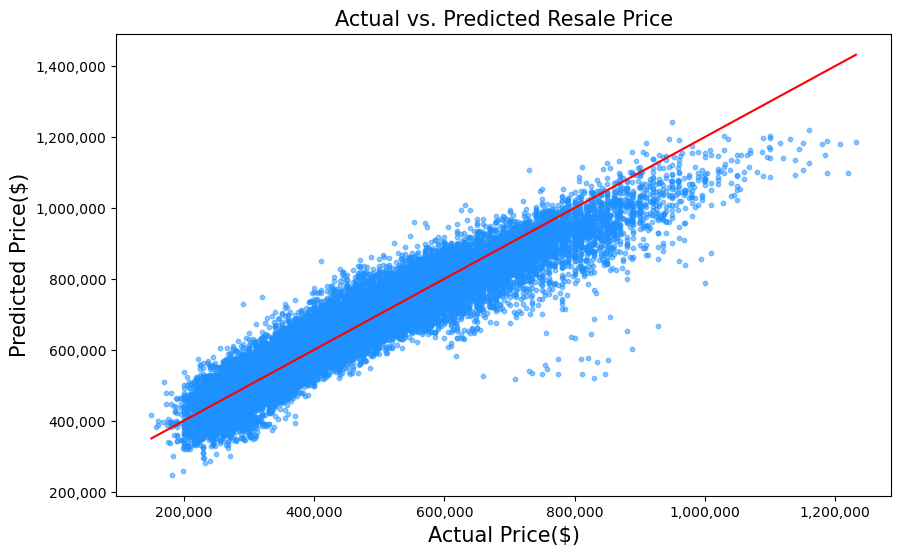

In [80]:
# Extract index values from y_test
y_test_index = y_test.index.tolist()  

# Convert y_preds to a DataFrame with index values from y_test
y_preds_df = pd.DataFrame(y_preds_1, index=y_test_index, columns=['resale_price'])

# Display y_preds_df
y_preds_df_round = round(y_preds_df)
y_preds_df_round

# Extract numerical values from y_test and y_preds
y_test_values = y_test.values.flatten()
y_preds_values = y_preds_df_round.values.flatten()

plt.figure(figsize=(10,6))

# Scatter plot of actual test values versus predicted values
plt.scatter(y_test_values, y_preds_values, alpha=0.5, color='dodgerblue', s=10)

# Line plot for perfect fit (actual = predicted)
plt.plot([min(y_test_values), max(y_test_values)], [min(y_test_values), max(y_test_values)], color='red')

plt.xlabel('Actual Price($)', fontsize = 15)
plt.ylabel('Predicted Price($)', fontsize = 15)
plt.title('Actual vs. Predicted Resale Price', fontsize = 15)

tick_labels = ['0', '200,000', '400,000', '600,000', '800,000', '1,000,000', '1,200,000', '1,400,000']
plt.gca().set_yticklabels(tick_labels)
plt.gca().set_xticklabels(tick_labels)
plt.show()

Interpretation:<br>
- The plot shows a positive correlation, where higher actual prices generally correspond to higher predicted prices.
- The data points are clustered around a diagonal line, which represents a perfect match between the actual and predicted prices. 
- However, at higher actual price, there is some deviation which suggests the prediction model has some errors or inaccuracies.
- Overall, the plot indicates that the prediction model performs reasonably well but needs to improved for higher prices around S$ 1 million and above

### 2.6 Model Evaluation

- We can say that all the models performed quite well, with R2 values around 0.87. 
- Additionally, the difference between the train and test R2 values are small from 0.0007 (0.08%) to 0.0012 (0.14%). 
- The difference between the train and test Root Mean Square Error values are small too. 
- The results are as follows:

| Regression Type              | Train R2 | Test R2 | Train Root Mean Square Error | Test Root Mean Square Error |
|------------------------------|----------|---------|------------------------------|-----------------------------|
| Linear Regression            | 0.8737   | 0.8727  | 50,990.87                    | 50,938.45                   |
| Lasso Regression             | 0.8718   | 0.8711  | 51,378.28                    | 51,248.59                   |
| Ridge Regression             | 0.8740   | 0.8728  | 50,941.09                    | 50,908.12                   |
| Ridge Regression (hypertuned)| 0.8740   | 0.8728  | 50,941.13                    | 50,908.00                   |

- Overall, the ridge regression model has the best performance in terms of R2 score and Root Mean Squared Error. 
- Regularisation enhanced the model's predictive performance as compared to if linear regression model was used.
- When it comes to the submission to Kaggle, we will be using the ridge regression after hyperparameter tuning.<br><br>
- Overall, we managed to create a strong model with an R2 value of 0.8740 (rounded up), which means that 87.4% of the variation of the resale price of an HDB flat can be explained by our model. 
- Our Root Mean Square Error is approximately 50,900. This means that on average, our predicted price can vary from the actual price by $50,900.

In [81]:
# Save the RidgeCV model to a pickle file using the joblib
dump(grid_search, 'ridge_model.pkl')

['ridge_model.pkl']